In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir('/kaggle/input'))
for i in os.listdir('/kaggle/input/image-colorization-dataset/data'):
    print(i)

['image-colorization-dataset']
test_color
train_color
train_black
test_black


In [2]:
import tensorflow
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

In [3]:
train_black_path='/kaggle/input/image-colorization-dataset/data/train_black'
train_color_path='/kaggle/input/image-colorization-dataset/data/train_color'
test_black_path='/kaggle/input/image-colorization-dataset/data/test_black'
test_color_path='/kaggle/input/image-colorization-dataset/data/test_color'

In [4]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]


for i in range(30):
    print(i)
    x_train_path=os.path.join('/kaggle/input/image-colorization-dataset/data/train_black',os.listdir(os.path.join('/kaggle/input/image-colorization-dataset/data/train_black'))[i])
    x_test_path=os.path.join('/kaggle/input/image-colorization-dataset/data/test_black',os.listdir(os.path.join('/kaggle/input/image-colorization-dataset/data/test_black'))[i])
    y_train_path=os.path.join('/kaggle/input/image-colorization-dataset/data/train_color',os.listdir(os.path.join('/kaggle/input/image-colorization-dataset/data/train_color'))[i])
    y_test_path=os.path.join('/kaggle/input/image-colorization-dataset/data/test_color',os.listdir(os.path.join('/kaggle/input/image-colorization-dataset/data/test_color'))[i])
    
    xtrain_img=cv2.imread(x_train_path)
    ytrain_img=cv2.imread(y_train_path)
    xtest_img=cv2.imread(x_test_path)
    ytest_img=cv2.imread(y_test_path)

    xtrain_img=xtrain_img/255
    ytrain_img=ytrain_img/255
    xtest_img=xtest_img/255
    ytest_img=ytest_img/255
    
    x_test.append(xtrain_img)
    y_test.append(ytrain_img)
    x_train.append(xtest_img)
    y_train.append(ytest_img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [5]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [6]:
from keras.layers import Conv2D,UpSampling2D
from keras.models import Sequential

#encoder
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",padding="same",strides=2,input_shape=(400,400,3)))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same",strides=2))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same",strides=2))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))


#decoder
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(Conv2D(16,(3,3),activation="relu",padding="same"))
model.add(Conv2D(3,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
model.summary()

2022-11-21 17:24:52.703104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 17:24:52.713088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 17:24:52.713853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 17:24:52.714953: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 128)     147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 256)     295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 512)       2

In [23]:
checkpoint_filepath = '/tmp/checkpoint'
from keras.callbacks import ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    patience=230,
    mode='max',
    save_best_only=True)

In [25]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test)
               
               ,epochs=500, callbacks=[model_checkpoint_callback])

Epoch 1/500
1/1 [==============================] - 1s 727ms/step - loss: 0.0064 - accuracy: 0.5893 - val_loss: 0.0142 - val_accuracy: 0.4370
Epoch 2/500
1/1 [==============================] - 1s 660ms/step - loss: 0.0063 - accuracy: 0.6062 - val_loss: 0.0140 - val_accuracy: 0.4964
Epoch 3/500
1/1 [==============================] - 1s 646ms/step - loss: 0.0063 - accuracy: 0.6485 - val_loss: 0.0144 - val_accuracy: 0.4818
Epoch 4/500
1/1 [==============================] - 1s 628ms/step - loss: 0.0065 - accuracy: 0.6542 - val_loss: 0.0143 - val_accuracy: 0.4595
Epoch 5/500
1/1 [==============================] - 1s 655ms/step - loss: 0.0064 - accuracy: 0.6312 - val_loss: 0.0145 - val_accuracy: 0.4327
Epoch 6/500
1/1 [==============================] - 1s 632ms/step - loss: 0.0063 - accuracy: 0.6156 - val_loss: 0.0143 - val_accuracy: 0.4338
Epoch 7/500
1/1 [==============================] - 1s 638ms/step - loss: 0.0062 - accuracy: 0.6387 - val_loss: 0.0143 - val_accuracy: 0.4820
Epoch 8/500
1

In [26]:
model.save("model.h5")

In [27]:
img=cv2.imread(os.path.join(test_black_path,"image5715.jpg"))
img=img/255
img=np.array(img)
img=np.expand_dims(img,axis=0)
img.shape

(1, 400, 400, 3)

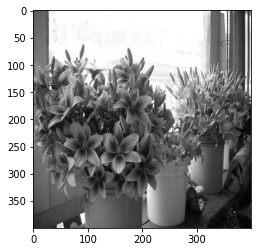

In [28]:
plt.imshow(img[0])

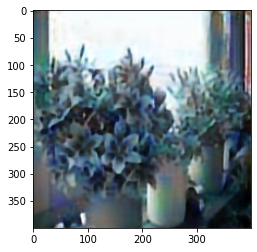

In [29]:
pred=model.predict(img)
plt.imshow(pred[0])